In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

In [2]:
import datetime as dt

import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

##Data Import

In [4]:
!unzip -qq '/content/archive (7).zip'

In [7]:
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [8]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [10]:
df.shape

(267, 9)

## Data Cleaning

In [11]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [14]:
df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)

In [15]:
df[' Frequency'] = df[' Frequency'].astype('category')

In [16]:
df['Month'] = df[' Date'].dt.month

In [17]:
df['Month_int'] = df['Month'].apply(lambda x : int(x))

In [18]:
df['Month_name'] = df['Month_int'].apply(lambda x : calendar.month_abbr[x])

In [19]:
df['Region'] = df['Region'].astype('category')

In [20]:
df.drop(['Month'], axis=1, inplace=True)

## Stats

In [21]:
df_stats = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
round(df_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate (%),267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [25]:
df_region_stats = df.groupby(['Region.1'])[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].mean().reset_index()
region_stats = round(df_region_stats, 2)
region_stats

,Region.1,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


<Axes: >

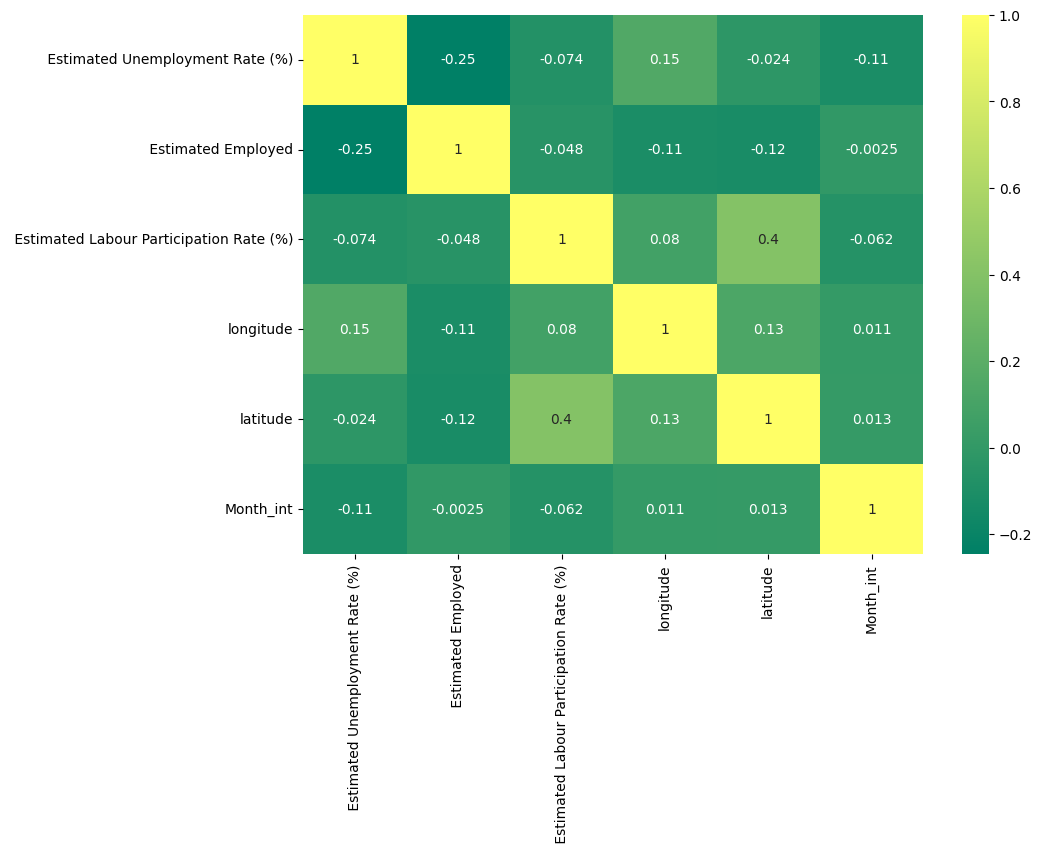

In [29]:
heat_maps = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed',
                ' Estimated Labour Participation Rate (%)', 'longitude',
                'latitude', 'Month_int']]

heat_maps = heat_maps.corr()
plt.figure(figsize=(10,7))
sns.heatmap(heat_maps, annot=True, cmap='summer')

##Data exploratory Analysis

In [31]:
fig = px.box(df,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# The below box shows unemployement rate in each state in India

In [35]:
fig = px.scatter_matrix(df,template='plotly',
    dimensions=[' Estimated Unemployment Rate (%)',' Estimated Employed',
                ' Estimated Labour Participation Rate (%)'],
    color='Region.1')
fig.show()

In [39]:
plot_ump = df[[' Estimated Unemployment Rate (%)','Region']]

df_unemp = plot_ump.groupby('Region').mean().reset_index()

df_unemp = df_unemp.sort_values(' Estimated Unemployment Rate (%)')

fig = px.bar(df_unemp, x='Region',y=' Estimated Unemployment Rate (%)',color='Region',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [41]:
fig = px.bar(df, x='Region.1',y=' Estimated Unemployment Rate (%)',animation_frame = 'Month_name',color='Region',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

In [43]:
unemplo_df = df[['Region','Region.1',' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']]

unemplo = unemplo_df.groupby(['Region.1','Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

In [44]:
fig = px.sunburst(unemplo, path=['Region.1','Region'], values=' Estimated Unemployment Rate (%)',
                  color_continuous_scale='Plasma',title= 'unemployment rate in each region and state',
                  height=650,template='ggplot2')


fig.show()

##Impact of Lockdown on States Estimated Employed

On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days

In [45]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region.1",
                     hover_name="Region", size=" Estimated Unemployment Rate (%)",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [46]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]

bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]

In [47]:
g_lock = lock.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

g_bf_lock = bf_lock.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()


g_lock['Unemployment Rate before lockdown'] = g_bf_lock[' Estimated Unemployment Rate (%)']

g_lock.columns = ['Region','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

g_lock.head(2)

,Region,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250


In [48]:
# percentage change in unemployment rate
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)

In [49]:
plot_per = g_lock.sort_values('percentage change in unemployment')

In [50]:
# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='Region',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')

fig.show()

##most impacted states/UT

* Puducherry
* Jharkhand
* Bihar
* Haryana
* Tripura



In [51]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x

In [52]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))

In [53]:
fig = px.bar(plot_per, y='Region',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)


fig.show()